In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Questão 1
Considere o conjunto de dados disponível em concrete.csv, organizado em 9
colunas, sendo as 8 primeiras colunas os atributos e a última coluna a saída.
Os 8 atributos referem-se à caracterização de diferentes tipos de concreto para
construção civil. A saída é a resistência à compressão do concreto (em megapascals, MPa). Maiores detalhes sobre os dados podem ser conferidos em
https://www.openml.org/d/4353.

a) Considere um modelo de regressão não linear baseado em redes neurais
artificiais. Separe os dados aleatoriamente em treino, validação e teste
(por exemplo, 60%, 20% e 20%). Nesse cenário, treine e avalie o modelo
abaixo:

- MLP (multilayer perceptron): 1 camada oculta e treinamento
em minibatch via gradiente descendente estocástico com termo de
momentum. Utilize o conjunto de validação para ajustar os hiperparâmetros.

b) Apresente as curvas da função custo nos conjuntos de treinamento e validação ao longo das épocas. Reporte também para os conjuntos de treino,
validação e teste as métricas abaixo:

- RMSE (root mean squared error): $\sqrt{\frac{1}{N}\sum_{i}(y_i - \hat{y}_i)^2}$;
- MAE (mean absolute error): $\frac{1}{N}\sum_{i}|y_i - \hat{y}_i|$;
- MRE (mean relative error): $\frac{1}{N}\sum_{i}\left|\frac{y_i - \hat{y}_i}{y_i}\right|$.


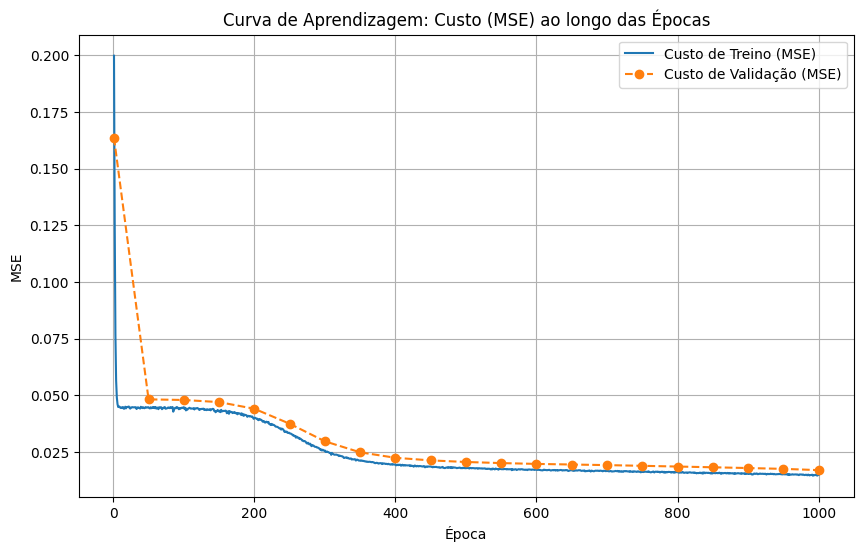

Métricas de Desempenho

Conjunto de Treino:
  RMSE (Root Mean Squared Error): 9.4166
  MAE (Mean Absolute Error): 7.3986
  MRE (Mean Relative Error): 0.2843

Conjunto de Validação:
  RMSE (Root Mean Squared Error): 10.1156
  MAE (Mean Absolute Error): 8.1014
  MRE (Mean Relative Error): 0.2991

Conjunto de Teste:
  RMSE (Root Mean Squared Error): 9.4438
  MAE (Mean Absolute Error): 7.2511
  MRE (Mean Relative Error): 0.2494


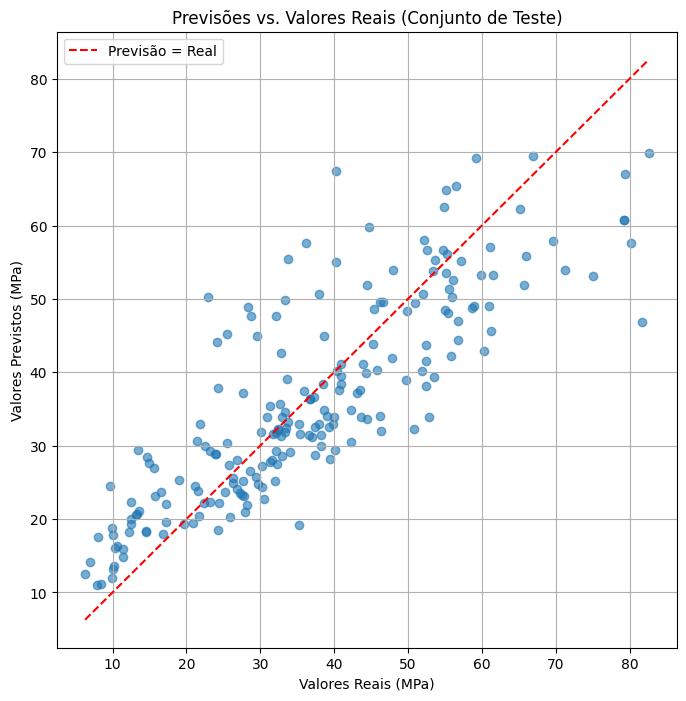

In [ ]:
def relu(x):
    return np.maximum(0, x)


def relu_derivada(x):
    return (x > 0).astype(float)


def mse(y_verdadeiro, y_previsao):
    return np.mean((y_verdadeiro - y_previsao)**2)


def mse_derivada(y_verdadeiro, y_previsao):
    return 2 * (y_previsao - y_verdadeiro) / len(y_verdadeiro)

def min_max_normalize(data, min_val=None, max_val=None):
    if min_val is None:
        min_val = np.min(data, axis=0)
        max_val = np.max(data, axis=0)

    denominator = (max_val - min_val)
    denominator[denominator == 0] = 1e-8
    return (data - min_val) / denominator, min_val, max_val

def min_max_denormalize(normalized_data, min_val, max_val):
    return normalized_data * (max_val - min_val) + min_val

def rmse(y_verdadeiro, y_previsao):
    return np.sqrt(np.mean((y_verdadeiro - y_previsao)**2))

def mae(y_verdadeiro, y_previsao):
    return np.mean(np.abs(y_verdadeiro - y_previsao))

def mre(y_verdadeiro, y_previsao):
    return np.mean(np.abs((y_verdadeiro - y_previsao) / (y_verdadeiro + 1e-8)))

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))

        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

        self.vw1 = np.zeros_like(self.W1)
        self.vb1 = np.zeros_like(self.b1)
        self.vw2 = np.zeros_like(self.W2)
        self.vb2 = np.zeros_like(self.b2)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, X, y_verdadeiro, y_previsao):
        delta2 = mse_derivada(y_verdadeiro, y_previsao)

        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        delta1 = np.dot(delta2, self.W2.T) * relu_derivada(self.z1)

        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate, momentum_rate):
        self.vw1 = momentum_rate * self.vw1 + (1 - momentum_rate) * dW1
        self.W1 -= learning_rate * self.vw1

        self.vb1 = momentum_rate * self.vb1 + (1 - momentum_rate) * db1
        self.b1 -= learning_rate * self.vb1

        self.vw2 = momentum_rate * self.vw2 + (1 - momentum_rate) * dW2
        self.W2 -= learning_rate * self.vw2

        self.vb2 = momentum_rate * self.vb2 + (1 - momentum_rate) * db2
        self.b2 -= learning_rate * self.vb2

data = pd.read_csv('concrete.csv', header=None)

X_original = data.iloc[:, :8].values
y_original = data.iloc[:, 8].values.reshape(-1, 1)

total_amostras = len(X_original)
indices = np.arange(total_amostras)
np.random.shuffle(indices)

tamanho_treino = int(0.6 * total_amostras)
tamanho_validacao = int(0.2 * total_amostras)

X_treino_original = X_original[indices[:tamanho_treino]]
y_treino_original = y_original[indices[:tamanho_treino]]

X_validacao_original = X_original[indices[tamanho_treino : tamanho_treino + tamanho_validacao]]
y_validacao_original = y_original[indices[tamanho_treino : tamanho_treino + tamanho_validacao]]

X_teste_original = X_original[indices[tamanho_treino + tamanho_validacao :]]
y_teste_original = y_original[indices[tamanho_treino + tamanho_validacao :]]

X_treino, X_min_treino, X_max_treino = min_max_normalize(X_treino_original)
y_treino, y_min_treino, y_max_treino = min_max_normalize(y_treino_original)

X_validacao, _, _ = min_max_normalize(X_validacao_original, X_min_treino, X_max_treino)
y_validacao, _, _ = min_max_normalize(y_validacao_original, y_min_treino, y_max_treino)

X_teste, _, _ = min_max_normalize(X_teste_original, X_min_treino, X_max_treino)
y_teste, _, _ = min_max_normalize(y_teste_original, y_min_treino, y_max_treino)


#Configuração e treinamento do Modelo MLP (Item a)
input_dim = X_treino.shape[1]
hidden_dim = 10
output_dim = 1

learning_rate = 0.01
momentum_rate = 0.9
epochs = 1000
batch_size = 32

model = MLP(input_dim, hidden_dim, output_dim)

train_costs = []
val_costs = []
epochs_for_val_plot = []

for epoch in range(epochs):
    indices = np.arange(len(X_treino))
    np.random.shuffle(indices)
    X_treino_shuffled = X_treino[indices]
    y_treino_shuffled = y_treino[indices]

    current_epoch_train_cost = 0
    num_batches = len(X_treino) // batch_size

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_treino_shuffled[start_idx:end_idx]
        y_batch = y_treino_shuffled[start_idx:end_idx]

        predictions = model.forward(X_batch)
        cost = mse(y_batch, predictions)
        current_epoch_train_cost += cost

        dW1, db1, dW2, db2 = model.backward(X_batch, y_batch, predictions)
        model.update_parameters(dW1, db1, dW2, db2, learning_rate, momentum_rate)

    train_costs.append(current_epoch_train_cost / num_batches)

    if (epoch + 1) % 50 == 0 or epoch == 0:
        val_predictions = model.forward(X_validacao)
        val_cost = mse(y_validacao, val_predictions)
        val_costs.append(val_cost)
        epochs_for_val_plot.append(epoch + 1)

#Apresentação das curvas de custo e métricas (Item b)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(train_costs) + 1), train_costs, label='Custo de Treino (MSE)')
plt.plot(epochs_for_val_plot, val_costs, label='Custo de Validação (MSE)', marker='o', linestyle='--')
plt.title('Curva de Aprendizagem: Custo (MSE) ao longo das Épocas')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

def print_metrics(set_name, y_true_norm, y_pred_norm, y_min_stats, y_max_stats):
    y_true_denorm = min_max_denormalize(y_true_norm, y_min_stats, y_max_stats)
    y_pred_denorm = min_max_denormalize(y_pred_norm, y_min_stats, y_max_stats)

    set_rmse = rmse(y_true_denorm, y_pred_denorm)
    set_mae = mae(y_true_denorm, y_pred_denorm)
    set_mre = mre(y_true_denorm, y_pred_denorm)

    print(f"\nConjunto de {set_name}:")
    print(f"  RMSE (Root Mean Squared Error): {set_rmse:.4f}")
    print(f"  MAE (Mean Absolute Error): {set_mae:.4f}")
    print(f"  MRE (Mean Relative Error): {set_mre:.4f}")

print("Métricas de Desempenho")

train_predictions_norm = model.forward(X_treino)
print_metrics("Treino", y_treino, train_predictions_norm, y_min_treino, y_max_treino)

val_predictions_norm = model.forward(X_validacao)
print_metrics("Validação", y_validacao, val_predictions_norm, y_min_treino, y_max_treino)

test_predictions_norm = model.forward(X_teste)
print_metrics("Teste", y_teste, test_predictions_norm, y_min_treino, y_max_treino)

plt.figure(figsize=(8, 8))
y_teste_denorm_plot = min_max_denormalize(y_teste, y_min_treino, y_max_treino)
test_predictions_denorm_plot = min_max_denormalize(test_predictions_norm, y_min_treino, y_max_treino)

plt.scatter(y_teste_denorm_plot, test_predictions_denorm_plot, alpha=0.6)
plt.plot([y_teste_denorm_plot.min(), y_teste_denorm_plot.max()],
         [y_teste_denorm_plot.min(), y_teste_denorm_plot.max()],
         '--r', label='Previsão = Real')
plt.xlabel('Valores Reais (MPa)')
plt.ylabel('Valores Previstos (MPa)')
plt.title('Previsões vs. Valores Reais (Conjunto de Teste)')
plt.grid(True)
plt.legend()
plt.show()

### Questão 2
Considere o conjunto de dados disponível em vowel.csv, organizado em 11
colunas, sendo as 10 primeiras colunas os atributos e a última coluna a saída.
Os 10 atributos referem-se à caracterização de amostras da fala de britânicos. A
saída é o fonema de vogal correspondente, dentre as 11 possibilidades. Maiores
detalhes sobre os dados podem ser conferidos em https://www.openml.org/d/
307.


a) Considere um modelo de classificação não linear baseado em redes neurais
artificiais. Separe os dados aleatoriamente em treino, validação e teste
(por exemplo, 60%, 20% e 20%). Nesse cenário, treine e avalie o modelo
abaixo:

- MLP (multilayer perceptron): 1 camada oculta e treinamento
em minibatch via gradiente descendente estocástico com termo de
momentum. Utilize o conjunto de validação para ajustar os hiperparâmetros.

b) Apresente as curvas da função custo nos conjuntos de treinamento e validação ao longo das épocas. Reporte também a acurácia obtida para os
conjuntos de treino, validação e teste. Por último, mostre a matriz de
confusão obtida no conjunto de teste.


Classificação de Vogais com MLP


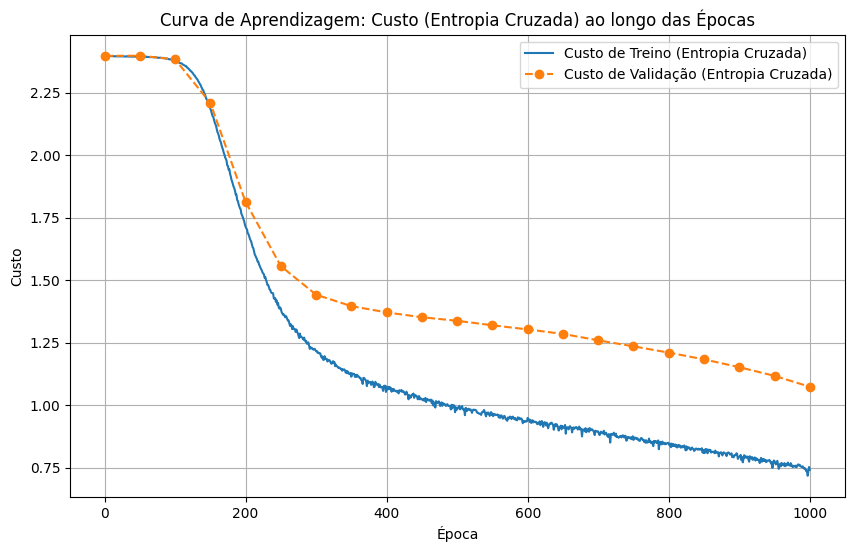


Métricas de Desempenho (Acurácia)
Conjunto de Treino: Acurácia = 0.7407
Conjunto de Validação: Acurácia = 0.6566
Conjunto de Teste: Acurácia = 0.6869

Matriz de Confusão (Conjunto de Teste)
[[15  0  0  0  0  0  0  0  0  0  0]
 [ 1 14  0  0  0  0  0  0  0  0  0]
 [ 0  3 18  0  0  0  0  0  1  0  0]
 [ 0  1  0 15  0  8  3  0  0  0  0]
 [ 0  0  1  3 18  0  0  1  0  5  1]
 [ 0  0  0  2  0 17  3  0  0  0  0]
 [ 3  3  0  0  0  4  3  1  0  0  0]
 [ 2  0  0  0  4  0  1  7  0  0  0]
 [ 0  0  3  0  0  0  0  0  9  0  2]
 [ 0  0  0  1  2  0  0  0  0 10  0]
 [ 0  0  1  0  1  0  0  0  0  1 10]]


In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivada(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_verdadeiro, y_previsao_proba):
    num_amostras = y_verdadeiro.shape[0]
    y_previsao_proba = np.clip(y_previsao_proba, 1e-10, 1 - 1e-10)
    loss = -np.sum(y_verdadeiro * np.log(y_previsao_proba)) / num_amostras
    return loss

def cross_entropy_softmax_derivada(y_verdadeiro, y_previsao_proba):
    return (y_previsao_proba - y_verdadeiro) / y_verdadeiro.shape[0]

def min_max_normalize(data, min_val=None, max_val=None):
    if min_val is None:
        min_val = np.min(data, axis=0)
        max_val = np.max(data, axis=0)

    denominator = (max_val - min_val)
    denominator[denominator == 0] = 1e-8
    return (data - min_val) / denominator, min_val, max_val

def min_max_denormalize(normalized_data, min_val, max_val):
    return normalized_data * (max_val - min_val) + min_val

def accuracy(y_verdadeiro, y_previsao_classes):
    return np.mean(y_verdadeiro.flatten() == y_previsao_classes.flatten())

def confusion_matrix(y_verdadeiro, y_previsao_classes, num_classes):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(y_verdadeiro)):
        true_label = int(y_verdadeiro[i])
        predicted_label = int(y_previsao_classes[i])
        matrix[true_label, predicted_label] += 1
    return matrix

class MLPClassifier:
    def __init__(self, input_size, hidden_size, output_size):

        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))

        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

        self.vw1 = np.zeros_like(self.W1)
        self.vb1 = np.zeros_like(self.b1)
        self.vw2 = np.zeros_like(self.W2)
        self.vb2 = np.zeros_like(self.b2)

    def forward(self, X):

        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2

    def backward(self, X, y_verdadeiro_one_hot, y_previsao_proba):
        delta2 = cross_entropy_softmax_derivada(y_verdadeiro_one_hot, y_previsao_proba)

        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        delta1 = np.dot(delta2, self.W2.T) * relu_derivada(self.z1)

        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate, momentum_rate):

        self.vw1 = momentum_rate * self.vw1 + (1 - momentum_rate) * dW1
        self.W1 -= learning_rate * self.vw1

        self.vb1 = momentum_rate * self.vb1 + (1 - momentum_rate) * db1
        self.b1 -= learning_rate * self.vb1

        self.vw2 = momentum_rate * self.vw2 + (1 - momentum_rate) * dW2
        self.W2 -= learning_rate * self.vw2

        self.vb2 = momentum_rate * self.vb2 + (1 - momentum_rate) * db2
        self.b2 -= learning_rate * self.vb2


print("Classificação de Vogais com MLP")

data = pd.read_csv('vowel.csv', header=None)

X_original = data.iloc[:, :10].values
y_original = data.iloc[:, 10].values.reshape(-1, 1).astype(int)

if np.min(y_original) != 0:
    print("Aviso: As classes de 'y' não começam em 0. Ajustando para 0-indexado.")
    y_original = y_original - np.min(y_original)

num_classes = len(np.unique(y_original))

def to_one_hot(y, num_classes):
    num_amostras = y.shape[0]
    one_hot = np.zeros((num_amostras, num_classes))
    one_hot[np.arange(num_amostras), y.flatten()] = 1
    return one_hot

total_amostras = len(X_original)
indices = np.arange(total_amostras)
np.random.shuffle(indices)

tamanho_treino = int(0.6 * total_amostras)
tamanho_validacao = int(0.2 * total_amostras)

X_treino_original = X_original[indices[:tamanho_treino]]
y_treino_original = y_original[indices[:tamanho_treino]]

X_validacao_original = X_original[indices[tamanho_treino : tamanho_treino + tamanho_validacao]]
y_validacao_original = y_original[indices[tamanho_treino : tamanho_treino + tamanho_validacao]]

X_teste_original = X_original[indices[tamanho_treino + tamanho_validacao :]]
y_teste_original = y_original[indices[tamanho_treino + tamanho_validacao :]]

X_treino, X_min_treino, X_max_treino = min_max_normalize(X_treino_original)

X_validacao, _, _ = min_max_normalize(X_validacao_original, X_min_treino, X_max_treino)
X_teste, _, _ = min_max_normalize(X_teste_original, X_min_treino, X_max_treino)

y_treino_one_hot = to_one_hot(y_treino_original, num_classes)
y_validacao_one_hot = to_one_hot(y_validacao_original, num_classes)
y_teste_one_hot = to_one_hot(y_teste_original, num_classes)


input_dim = X_treino.shape[1]
hidden_dim = 20
output_dim = num_classes

learning_rate = 0.05
momentum_rate = 0.9
epochs = 1000
batch_size = 64

model = MLPClassifier(input_dim, hidden_dim, output_dim)

train_costs = []
val_costs = []
epochs_for_val_plot = []

for epoch in range(epochs):
    indices = np.arange(len(X_treino))
    np.random.shuffle(indices)
    X_treino_shuffled = X_treino[indices]
    y_treino_one_hot_shuffled = y_treino_one_hot[indices]

    current_epoch_train_cost = 0
    num_batches = len(X_treino) // batch_size

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        X_batch = X_treino_shuffled[start_idx:end_idx]
        y_batch_one_hot = y_treino_one_hot_shuffled[start_idx:end_idx]

        predictions_proba = model.forward(X_batch)
        cost = cross_entropy_loss(y_batch_one_hot, predictions_proba)
        current_epoch_train_cost += cost

        dW1, db1, dW2, db2 = model.backward(X_batch, y_batch_one_hot, predictions_proba)
        model.update_parameters(dW1, db1, dW2, db2, learning_rate, momentum_rate)

    train_costs.append(current_epoch_train_cost / num_batches)

    if (epoch + 1) % 50 == 0 or epoch == 0:
        val_predictions_proba = model.forward(X_validacao)
        val_cost = cross_entropy_loss(y_validacao_one_hot, val_predictions_proba)
        val_costs.append(val_cost)
        epochs_for_val_plot.append(epoch + 1)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(train_costs) + 1), train_costs, label='Custo de Treino (Entropia Cruzada)')
plt.plot(epochs_for_val_plot, val_costs, label='Custo de Validação (Entropia Cruzada)', marker='o', linestyle='--')
plt.title('Curva de Aprendizagem: Custo (Entropia Cruzada) ao longo das Épocas')
plt.xlabel('Época')
plt.ylabel('Custo')
plt.legend()
plt.grid(True)
plt.show()


print("\nMétricas de Desempenho (Acurácia)")

y_treino_labels = np.argmax(y_treino_one_hot, axis=1)
y_validacao_labels = np.argmax(y_validacao_one_hot, axis=1)
y_teste_labels = np.argmax(y_teste_one_hot, axis=1)

train_preds_classes = np.argmax(model.forward(X_treino), axis=1)
val_preds_classes = np.argmax(model.forward(X_validacao), axis=1)
test_preds_classes = np.argmax(model.forward(X_teste), axis=1)

print(f"Conjunto de Treino: Acurácia = {accuracy(y_treino_labels, train_preds_classes):.4f}")
print(f"Conjunto de Validação: Acurácia = {accuracy(y_validacao_labels, val_preds_classes):.4f}")
print(f"Conjunto de Teste: Acurácia = {accuracy(y_teste_labels, test_preds_classes):.4f}")

print("\nMatriz de Confusão (Conjunto de Teste)")
test_confusion_matrix = confusion_matrix(y_teste_labels, test_preds_classes, num_classes)
print(test_confusion_matrix)